In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import odeint
plt.rcParams['axes.titlesize'] = 24  
plt.rcParams['axes.labelsize'] = 20  
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.titlepad'] = 40 
plt.rcParams['axes.labelpad'] = 16 

/Users/cray/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:2166: RuntimeWarning: invalid value encountered in greater_equal
  condition = (xf >= v1) & (xf <= v2)
/Users/cray/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:2166: RuntimeWarning: invalid value encountered in less_equal
  condition = (xf >= v1) & (xf <= v2)


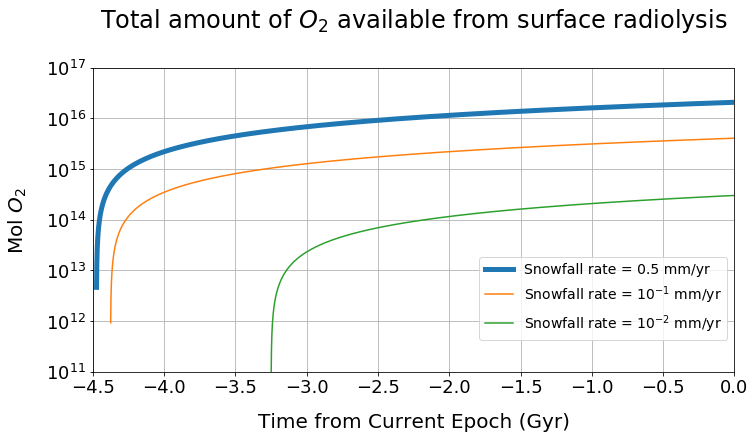

In [2]:
#Start at the Surface
#O2 Delivery through the Ice Shell


#take south pole region to span 60 deg south latitude
#integrate to get surface area of south pole
R = 252 * 10**3 #m

def Afunc_phi(x):
	return np.sin(x)
def Afunc_theta(x):
	return 1
	
Aphi_int = integrate.quad(Afunc_phi, 0, np.pi/6.0)
Atheta_int = integrate.quad(Afunc_theta, 0, 2*np.pi)

A_SF = R**2 * Aphi_int[0] * Atheta_int[0]

### Snowfall rate --consider steady-state system at south pole ###

#Include some varying snow fall rates
SF_up = 0.5 * 10**-3
#SF_low = (10**-2) * 10**-3
SF_range = np.asarray([10**-4, 10**-3, 10**-2, 10**-1, 10**0]) * 10**-3

r_SF = A_SF * SF_up * 5.2 * 10**5 #m^3/yr * g/m^3 = g/yr, 0.5 comes from article Hunter sent
r_SFrange = A_SF * SF_range * 5.2 * 10**5

###check on limit from H2 paper- source # 76 ###

#18.01 g/mol, 0.2 mol O2/mol H2O
#rO2_SF3 = (r_SF/18.0) * (10**-5) #g/yr * mol_H2O /g * mol_O2/mol_H2O = mol_O2/yr
rO2_SF = (r_SF/18.0) * (6 * 10**-6) #g/yr * mol_H2O /g * mol_O2/mol_H2O = mol_O2/yr
rO2_SFrange = (r_SFrange/18.0) * (6 * 10**-6)
#rO2_SFlow = (r_SFlow/18.0) * (6 * 10**-6) #g/yr * mol_H2O /g * mol_O2/mol_H2O = mol_O2/yr
#rO2_SF4 = (r_SF/18.0) * (10**-6) #g/yr * mol_H2O /g * mol_O2/mol_H2O = mol_O2/yr

### Add for total delivery rate & integrate over enceladus lifetime ###
#rO2_3 = rO2_SF3
rO2_ice = rO2_SF
rO2_icerange = rO2_SFrange
#rO2_icelow = rO2_SFlow
#rO2_4 = rO2_SF4

#Calculate initial delivery period
r_ice = 12.5
t_del = r_ice/(SF_up * 10**-3) #km/(km yr^-1) = yr
t_delrange = r_ice/(SF_range * 10**-3)

#add delivery period upper limit from Hand
t_delupper = 0.5 * 10**9
t_delupplot = -4.0
rO2_low = (((r_ice/t_delupper)*10**3 * A_SF * 5.2 * 10**5)/18.0) * 6 * 10**-6

### Plot total O2 production by surface radiolysis with fixed tau_d ###

def buildup(t, t_del, rO2):
    N = len(t)
    O2 = np.zeros(N)
    t_step = t[1] - t[0]
    for i in range(0,N):
        time = t[i]
        if time <= t_del:
            O2[i] = 0.0
        else:
            O2[i] = (rO2 * t_step) + O2[i-1]
    return O2
    
#Set timescale
#t_plot = np.arange(0.000, 4.501, 0.001)
t_plot = np.arange(-4.500, 0.001, 0.001)
t = np.arange(0, 4.501, 0.001) * 10**9 
t_step = t[1] - t[0] 
N = len(t)


#Shorter timescale
#t_plot = np.arange(0, 1, 0.001)
#t = np.arange(0, 1, 0.001)*10**8 
#t_step = 0.001*10**8

O2_ice = buildup(t, t_del, rO2_ice)

O2_icerange = np.zeros([5, len(t)])
for i in range(0,5):
    O2_icerange[i] = buildup(t, t_delrange[i], rO2_icerange[i])
    
O2_low = buildup(t, t_delupper, rO2_low)
    
#Convert all zeros to nan for plotting
def zero_to_nan(values):
    return [float('nan') if x==0 else x for x in values]


#Plot cumulative O2 delivery from ice shell
fig2 = plt.figure(2)
fig2.set_figheight(6.5)
fig2.set_figwidth(11)
plt.clf()
#plt.plot(t_plot, zero_to_nan(O2_icerange[0]), label = ('Snowfall rate = $10^{-4}$ mm/yr'))
#plt.plot(t_plot, zero_to_nan(O2_icerange[1]), label = ('Snowfall rate = $10^{-3}$ mm/yr'))
plt.plot(t_plot, zero_to_nan(O2_ice), linewidth = 5.0, label = ('Snowfall rate = 0.5 mm/yr'))
plt.plot(t_plot, zero_to_nan(O2_icerange[3]), label = ('Snowfall rate = $10^{-1}$ mm/yr'))
#plt.plot(t_plot, zero_to_nan(O2_low), label = 'Snowfall rate = $10^{-1.3}$ mm/yr')
plt.plot(t_plot, zero_to_nan(O2_icerange[2]), label = ('Snowfall rate = $10^{-2}$ mm/yr'))
#plt.plot([t_delupplot, t_delupplot], [10**11, 10**17], 'k--') 
#plt.text(-3.9, 10**12.1, 'Europa delivery period \ncutoff from Hand (2007)', fontsize = 12)
#plt.plot(t_plot, zero_to_nan(O2_icerange[4]), label = ('Snowfall rate = 1.0 mm/yr'))
plt.yscale('symlog')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel('Mol $O_{2}$')
plt.xlim(-4.5, 0)
plt.ylim(10**11, 10**17.001)
plt.title(r"Total amount of $O_{2}$ available from surface radiolysis") 
plt.legend(bbox_to_anchor=(1,0.4), prop={'size': 14})
plt.subplots_adjust(left=0.12, right=0.93, top=0.8, bottom=0.15)
plt.grid()
#plt.savefig('TotalO2_SurfaceRad.png')



/Users/cray/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:2166: RuntimeWarning: invalid value encountered in greater_equal
  condition = (xf >= v1) & (xf <= v2)
/Users/cray/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:2166: RuntimeWarning: invalid value encountered in less_equal
  condition = (xf >= v1) & (xf <= v2)


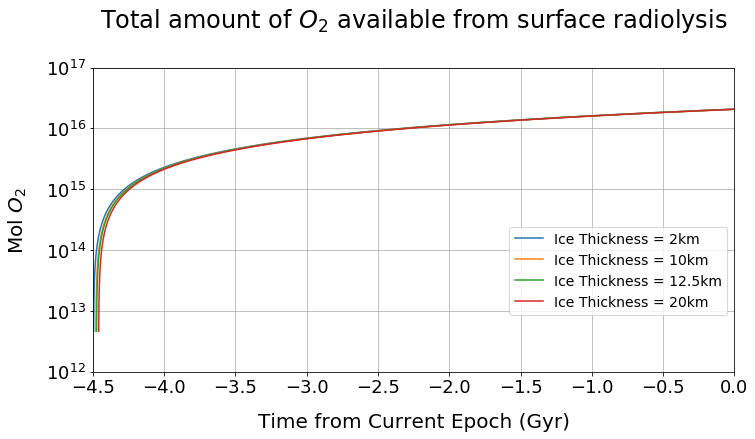

In [5]:
#What happens if we vary the ice shell thickness?
rshell_range = np.array([2, 10, 20, 100, 1000])
tdel_shellrange = rshell_range/(SF_up * 10**-3)

O2shell_range = np.zeros([5, len(t)])
for i in range(0,5):
    O2shell_range[i] = buildup(t, tdel_shellrange[i], rO2_ice)

fig3 = plt.figure(3)
fig3.set_figheight(6.5)
fig3.set_figwidth(11)
plt.clf()
plt.plot(t_plot, zero_to_nan(O2shell_range[0]), label = ('Ice Thickness = 2km'))
plt.plot(t_plot, zero_to_nan(O2shell_range[1]), label = ('Ice Thickness = 10km'))
plt.plot(t_plot, zero_to_nan(O2_ice), label = ('Ice Thickness = 12.5km'))
plt.plot(t_plot, zero_to_nan(O2shell_range[2]), label = ('Ice Thickness = 20km'))
#plt.plot([t_delupplot, t_delupplot], [10**11, 10**17], 'k--') 
#plt.text(-3.9, 10**12.1, 'Europa delivery period \ncutoff from Hand (2007)', fontsize = 12)
#plt.plot(t_plot, zero_to_nan(O2_icerange[4]), label = ('Snowfall rate = 1.0 mm/yr'))
plt.yscale('symlog')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel('Mol $O_{2}$')
plt.xlim(-4.5, 0)
plt.ylim(10**12, 10**17.001)
plt.title(r"Total amount of $O_{2}$ available from surface radiolysis") 
plt.legend(bbox_to_anchor=(1,0.5), prop={'size': 14})
plt.subplots_adjust(left=0.12, right=0.93, top=0.8, bottom=0.15)
plt.grid()
#plt.savefig('TotalO2_SurfaceRadShellVary.png')

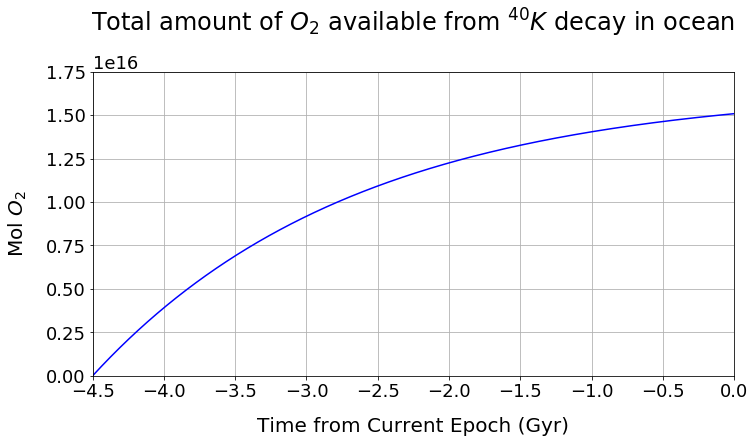

In [13]:
#Potassium Decay in the Ocean 

#From Draganic et al:
lambda_K = 5.4 * 10**-10 #yr^-1
N_A = 6.022*10**23
M_ocean = 10**19 #kg

M_D = 1.4 * 10**21 #kg
rH2_D = (3.8 * 10**18)/(2.016 * 100 * 10**6 * M_D)
rO2_D = (3.0 * 10**19)/(32.02 * 100 * 10**6 * M_D)
rH2O2_D = (1.1 * 10**18)/(34.015 * 100 * 10**6 * M_D)

K40_D = (6 * 10**18)/N_A

kH2 = rH2_D/K40_D #yr^-1
kO2 = rO2_D/K40_D
kH2O2 = rH2O2_D/K40_D
kH2C = 2*kO2 + kH2O2

#Calculate K40 concentration 4.5 Gyr ago (K40_0) and as a function of time (K40)
K_conc = 1.0 * 10**-3 #mol/kg H2O
K40_frac = 1.17 * 10**-4
K40_now = K_conc * K40_frac #mol K/kg H2O
#K40_conc = 0.00145 * K_conc ##need to ask chris why N_0's don't match

K40_0 = (K40_now * M_ocean) * np.exp(lambda_K * 4.5*10**9) * N_A #mol/kg H2O * kg H2O * atoms/mol = atoms total
K40 = K40_0 * np.exp(-lambda_K * t)

 
rH2_K, H2_K, rO2_K, O2_K, rH2O2_K, H2O2_K = np.loadtxt('O2Potassium.txt', delimiter = ',', skiprows = 1, unpack = 'true') 

fig3 = plt.figure(3)
fig3.set_figheight(6.5)
fig3.set_figwidth(11)
plt.clf()
plt.plot(t_plot, O2_K, 'b-')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel('Mol $O_{2}$')
plt.xlim(-4.5, 0)
plt.ylim(0, 1.75 * 10**16)
plt.title(r"Total amount of $O_{2}$ available from $^{40}K$ decay in ocean")
plt.subplots_adjust(left=0.12, right=0.93, top=0.8, bottom=0.15)
plt.grid()
#plt.savefig('TotalO2_K40Decay.png')

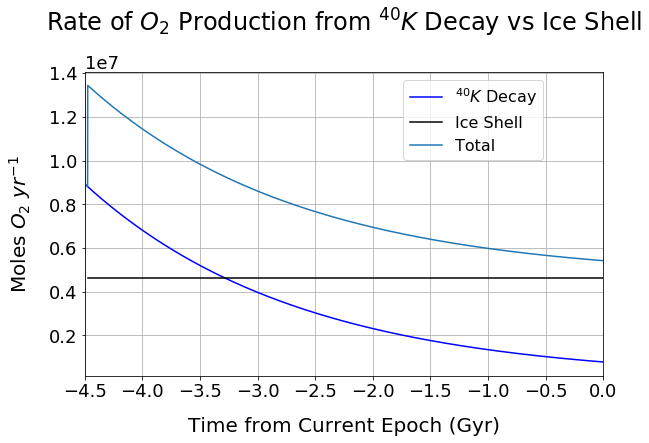

In [7]:
#Now lets look at the actual rate
rO2_icet = np.zeros(N)
for i in range (0, len(t)):
    if t[i] <= t_del:
        rO2_icet[i] = 0.0
    else:
        rO2_icet[i] = rO2_ice
rO2_total = rO2_icet + rO2_K

fig4 = plt.figure(4)
fig4.set_figheight(6.5)
fig4.set_figwidth(9)
plt.clf()
plt.plot(t_plot, rO2_K, 'b-', label = '$^{40}K$ Decay')
plt.plot([-4.475, 0.0], [rO2_ice, rO2_ice], 'k-', label = 'Ice Shell')
plt.plot(t_plot, rO2_total, label = 'Total')
plt.plot
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel('Moles $O_{2}$ $yr^{-1}$')
plt.xlim(-4.5, 0)
#plt.ylim(0.0, 8.0 * 10**16)
plt.title(r"Rate of $O_{2}$ Production from $^{40}K$ Decay vs Ice Shell")
plt.legend(bbox_to_anchor=(0.9,1), prop={'size': 16})
plt.subplots_adjust(left=0.13, right=0.93, top=0.8, bottom=0.15)
plt.grid()
#plt.savefig('O2ProductionRates.png')

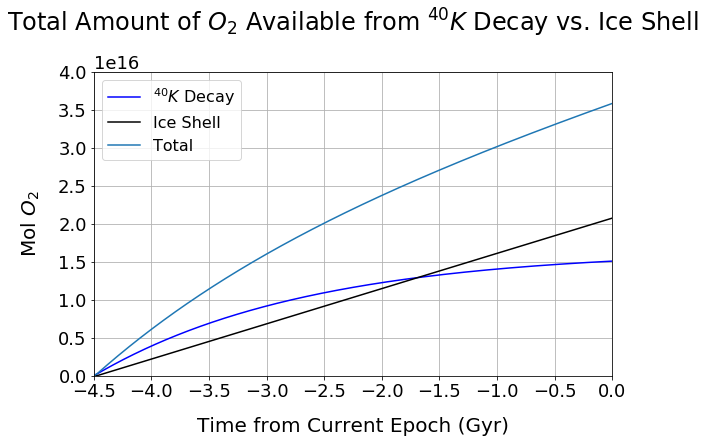

In [9]:
#Compare O2 from SF vs 40K
O2_total = O2_ice + O2_K

fig5 = plt.figure(5)
fig5.set_figheight(6.5)
fig5.set_figwidth(9)
plt.clf()
plt.plot(t_plot, O2_K, 'b-', label = '$^{40}K$ Decay')
plt.plot(t_plot, O2_ice, 'k-', label = 'Ice Shell')
plt.plot(t_plot, O2_total, label = 'Total')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel('Mol $O_{2}$')
plt.xlim(-4.5, 0.0)
plt.ylim(0.0, 4.0 * 10**16)
plt.title(r"Total Amount of $O_{2}$ Available from $^{40}K$ Decay vs. Ice Shell")
plt.legend(bbox_to_anchor=(0.30,1), prop={'size': 16})
plt.subplots_adjust(left=0.13, right=0.93, top=0.8, bottom=0.15)
plt.grid()
#plt.savefig('O2_Cumulative.png')

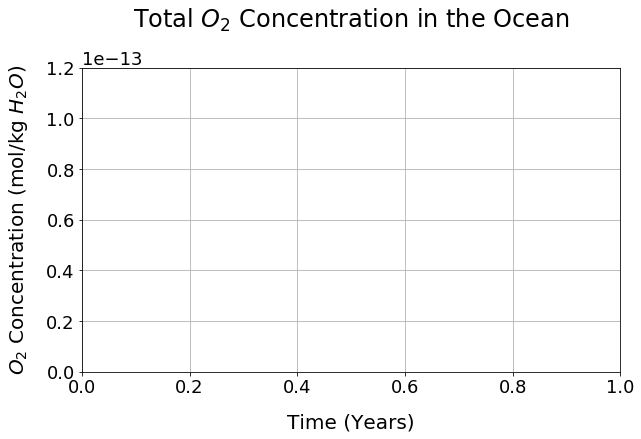

In [15]:
###Oxygen Sinks###

#OCEAN#
pH = np.array([9, 11])
pOH = 14.94 - pH #for 0 deg C and 1 bar
OH = 10.0**(-pOH)
I = 0.1
T = 278

###Reaction 1: 4Fe(II) + O2 + 6H2O = 4FeOOH + 2H+###
log_k1 = 21.56 - (1545/T) - 3.29*np.sqrt(I) + 1.52*I #from eqn 31 in Millero 1986
k1 = (10**log_k1)*(60*24*365)
Fe2 = np.arange(-9.0, -3.0, 0.1) #molar 


###Reaction 2: H2S + 2O2 = SO4 + 2H+ ###
#k2 = (10**(1.13))*(60*24*365) #minutes I hope???
log_k2 = 11.78 - ((3*10**3)/T) + 0.44*np.sqrt(I) #from eqn 13 in Millero 1987
k2 = (10**log_k2)*(60*24*365)

#Ask Chris what iron concentration range is appropriate
#10**-9 to 10**-3, log scale
#H2S = np.arange(-9.0, -2.9, 0.1) #molar 
H2S = (10**-5.4)

#Constrain H2S concentration from INMS
H2S_upper = (100/(10**6)) * (34.08/18.015) #ppm - 1 g per 10^6 g H2O

#Without worrying about K40 yet, calculate ocean concentration at equilibrium
A = (rO2_ice/M_ocean)
#A_3 = (rO2_3/M_ocean)
#A_4 = (rO2_4/M_ocean)

B = ((0.25*(k1*Fe2*OH**2)) + (2.0*k2*H2S))

#t_O2 = np.arange(0,1.0, 0.001)

#O2_conc = (A/B) - (A/B)*np.exp(-B*t_O2)
#O2_conc3 = (A_3/B) - (A_3/B)*np.exp(-B*t_O2)
#O2_conc4 = (A_4/B) - (A_4/B)*np.exp(-B*t_O2)

fig7 = plt.figure(7)
fig7.set_figheight(6.5)
fig7.set_figwidth(11)
plt.clf()
#plt.plot(t_O2, O2_conc, 'k-', label = r'$6 \times 10^{-4}$ % $O_{2}$')
#plt.plot(t_O2, O2_conc3, 'g--', label = r'$10^{-3}$ % $O_{2}$')
#plt.plot(t_O2, O2_conc4, 'b--', label = r'$10^{-4}$ % $O_{2}$')
plt.xlabel('Time (Years)')
plt.ylabel('$O_{2}$ Concentration (mol/kg $H_{2}O$)')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.2*10**-13)
plt.title(r"Total $O_{2}$ Concentration in the Ocean") #$\tau_d$ = %d Myr" %(t_up*10**-6)
plt.legend(bbox_to_anchor=(1,1),prop={'size': 15})
plt.subplots_adjust(left=0.12, right=0.8, top=0.8, bottom=0.15)
plt.grid()
#plt.savefig('O2Conc_New.png')

In [ ]:
#Start by integrating over the initial delivery period where rO2_ice = 0
C = kO2*(K40_0/(N_A*M_ocean))

#t_O2 = np.arange(0.0, 1.0, 0.000001)
#O2_del = (C/(B - lambda_K)) * (np.exp(-lambda_K*t_O2) - np.exp(-B*t_O2))

#fig8 = plt.figure(8)
#fig8.set_figheight(6.5)
#fig8.set_figwidth(9)
#plt.clf()
#plt.plot(t_O2, O2_del, 'b-')
#plt.xlabel('Time (Years)')
#plt.ylabel('$O_{2}$ Concentration (mol/kg $H_{2}O$)')
#plt.xlim(0.0, 1.0)
#plt.ylim(0.0, 4.0*10**-14)
#plt.title(r"Total $O_{2}$ Concentration in the Ocean in the First Year")
#plt.legend(bbox_to_anchor=(1,1),prop={'size': 15})
#plt.subplots_adjust(left=0.12, right=0.9, top=0.8, bottom=0.15)
#plt.grid()
#plt.savefig('O2Conc_1yr.png')

#Now let's try to solve the ODE numerically
#1 Year after t = 2.5 x 10^7
#Calculate the concentration at 2.5 x 10^7 years to start numerical integration
#start = len(t_O2)
#O2_0 = O2_del[start-1]
#t_int = np.arange(2.5, 2.5000001, 0.000000001)*10**7
#t_intstep = t_int[1]-t_int[0]
#O2_conc = np.zeros(len(t_int))
#dO2_dt = np.zeros(len(t_int))

#for i in range(0, len(t_int)):
#    if i == 0:
#        O2_conc[i] = O2_0
#        dO2_dt[i] = A + C*np.exp(-lambda_K*t_int[i]) - B*O2_0
#    else:
#        O2_conc[i] = dO2_dt[i-1]*t_intstep + O2_conc[i-1]
#        dO2_dt[i] = A + C*np.exp(-lambda_K*t_int[i]) - B*O2_conc[i-1]
     
        
#fig9 = plt.figure(9)
#fig9.set_figheight(6.5)
#fig9.set_figwidth(9)
#plt.clf()
#plt.plot(t_int, O2_conc, 'b-')
#plt.xlabel('Time (Years)')
#plt.ylabel('$O_{2}$ Concentration (mol/kg $H_{2}O$)')
#plt.xlim(2.5*10**7, 2.5000001*10**7)
#plt.ylim(3.0*10**-14, 5.5*10**-14)
#plt.title(r"Total $O_{2}$ Concentration in the Ocean") #$\tau_d$ = %d Myr" %(t_up*10**-6)
#plt.legend(bbox_to_anchor=(1,1),prop={'size': 15})
#plt.subplots_adjust(left=0.12, right=0.9, top=0.8, bottom=0.15)
#plt.grid()
#plt.savefig('IntegratedO2.png')

In [ ]:
#So clearly H2S & Fe(II) are just driving this to steady-state. In that case, we'll just use the steady state concentration to track sulfate & Fe(III) production

#Calculate steady state concentration for before & after 10&7 years
t_SS = np.arange(0, 4.50001, 0.00001)*10**9
t_SSplot = np.arange(-4.5, 0.00001, 0.00001)
N_SS = len(t_SS)

SS = np.zeros([len(pH), N_SS])
for i in range (0, len(pH)):
    for j in range(0, N_SS):
        if t_SS[j]<=2*10**7:
             SS[i,j] = (C*np.exp(-lambda_K*t_SS[j]))/B[i]
        else:
             SS[i,j] = (A+C*np.exp(-lambda_K*t_SS[j]))/B[i]


#Calculate sulfate from steady-state O2       
dSO4_dt = k2*H2S*SS
SO4_conc = np.zeros([len(pH), N_SS])

for i in range (0, len(pH)):
    for j in range (0, N_SS):
        timestep = t_SS[1] - t_SS[0]
        if j == 0:
            SO4_conc[i,j] = 0.0
        else:
            SO4_conc[i,j] = dSO4_dt[i,j]*timestep + SO4_conc[i,j-1] 
        
        
#Calculate FeOH3 from steady-state O2
dFeO_dt = np.zeros([len(pH), N_SS])
FeO_conc = np.zeros([len(pH), N_SS])

for i in range (0, len(pH)):
    dFeO_dt[i] = k1*Fe2*(OH[i]**2)*SS[i,:]
    for j in range (0, N_SS):
        timestep = t_SS[1] - t_SS[0]
        if j == 0:
            FeO_conc[i,j] = 0.0
        else:
            FeO_conc[i,j] = dFeO_dt[i,j]*timestep + FeO_conc[i,j-1] 
                
fig10 = plt.figure(10)
fig10.set_figheight(6.5)
fig10.set_figwidth(10)
plt.clf()
#plt.plot(t_SSplot, np.log10(SS[0]*10**3), label = 'pH = 8')
#plt.plot(t_SSplot, np.log10(SS[1]*10**3), label = 'pH = 9')
#plt.plot(t_SSplot, np.log10(SS[2]*10**3), label = 'pH = 10')
#plt.plot(t_SSplot, np.log10(SS[3]*10**3), label = 'pH = 11')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel('Concentration (mmol/kg $H_{2}O$)')
plt.xlim(-4.5, 0.0)
#plt.ylim(2.0*10**-14, 5.5*10**-14)
plt.title(r"Steady State $O_2$ Concentration in the Ocean") #$\tau_d$ = %d Myr" %(t_up*10**-6)
plt.legend(bbox_to_anchor=(0.9,1),prop={'size': 15})
plt.subplots_adjust(left=0.16, right=0.9, top=0.8, bottom=0.15)
plt.grid()
#plt.savefig('O2Concentrations.png')  

fig11 = plt.figure(10)
fig11.set_figheight(6.5)
fig11.set_figwidth(10)
plt.clf()
plt.plot(t_SSplot, SO4_conc[0]*10**3, label = 'pH = 8')
plt.plot(t_SSplot, SO4_conc[1]*10**3, label = 'pH = 9')
plt.plot(t_SSplot, SO4_conc[2]*10**3, label = 'pH = 10')
plt.plot(t_SSplot, SO4_conc[3]*10**3, label = 'pH = 11')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel('Concentration (mmol/kg $H_{2}O$)')
plt.xlim(-4.5, 0.0)
#plt.ylim(2.0*10**-14, 5.5*10**-14)
plt.title(r"Steady State Sulfate Concentration in the Ocean") #$\tau_d$ = %d Myr" %(t_up*10**-6)
plt.legend(bbox_to_anchor=(0.3,1),prop={'size': 15})
plt.subplots_adjust(left=0.16, right=0.9, top=0.8, bottom=0.15)
plt.grid()
#plt.savefig('SulfateConcentrations.png')  

fig12 = plt.figure(12)
fig12.set_figheight(6.5)
fig12.set_figwidth(10)
plt.clf()
plt.plot(t_SSplot, FeO_conc[0]*10**3, label = 'pH = 8')
plt.plot(t_SSplot, FeO_conc[1]*10**3, label = 'pH = 9')
plt.plot(t_SSplot, FeO_conc[2]*10**3, label = 'pH = 10')
plt.plot(t_SSplot, FeO_conc[3]*10**3, label = 'pH = 11')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel('Concentration (mmol/kg $H_{2}O$)')
plt.xlim(-4.5, 0.0)
#plt.ylim(2.0*10**-14, 5.5*10**-14)
plt.title(r"Steady State Geothite Concentration in the Ocean") #$\tau_d$ = %d Myr" %(t_up*10**-6)
plt.legend(bbox_to_anchor=(0.3,1),prop={'size': 15})
plt.subplots_adjust(left=0.16, right=0.9, top=0.8, bottom=0.15)
plt.grid()
#plt.savefig('GeothiteConcentrations.png')  

fig13 = plt.figure(13)
fig13.set_figheight(6.5)
fig13.set_figwidth(10)
plt.clf()
plt.plot(t_SSplot, np.log10(SS[0]*10**3), label = '$O_2$')
plt.plot(t_SSplot[1:], np.log10(SO4_conc[0,1:]*10**3), label = '$SO_4^{2-}$')
plt.plot(t_SSplot[1:], np.log10(FeO_conc[0,1:]*10**3), label = 'FeOOH')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel(r'Concentration [Log($\frac{mmol}{kg H_{2}O}$)]')
plt.xlim(-4.5, 0.0)
#plt.ylim(2.0*10**-14, 5.5*10**-14)
plt.title(r"Oxidant Concentrations at pH = 8") #$\tau_d$ = %d Myr" %(t_up*10**-6)
plt.legend(bbox_to_anchor=(0.7,0.3),prop={'size': 15})
plt.subplots_adjust(left=0.16, right=0.9, top=0.8, bottom=0.15)
plt.grid()
plt.savefig('OxidantspH8.png')  

fig14 = plt.figure(14)
fig14.set_figheight(6.5)
fig14.set_figwidth(10)
plt.clf()
plt.plot(t_SSplot, np.log10(SS[1]*10**3), label = '$O_2$')
plt.plot(t_SSplot[1:], np.log10(SO4_conc[1,1:]*10**3), label = '$SO_4^{2-}$')
plt.plot(t_SSplot[1:], np.log10(FeO_conc[1,1:]*10**3), label = 'FeOOH')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel(r'Concentration [Log($\frac{mmol}{kg H_{2}O}$)]')
plt.xlim(-4.5, 0.0)
#plt.ylim(2.0*10**-14, 5.5*10**-14)
plt.legend(bbox_to_anchor=(0.7,0.3),prop={'size': 15})
plt.subplots_adjust(left=0.16, right=0.9, top=0.8, bottom=0.15)
plt.grid()
plt.savefig('OxidantspH9.png')

fig15 = plt.figure(15)
fig15.set_figheight(6.5)
fig15.set_figwidth(10)
plt.clf()
plt.plot(t_SSplot, np.log10(SS[2]*10**3), label = '$O_2$')
plt.plot(t_SSplot[1:], np.log10(SO4_conc[2,1:]*10**3), label = '$SO_4^{2-}$')
plt.plot(t_SSplot[1:], np.log10(FeO_conc[2,1:]*10**3), label = 'FeOOH')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel(r'Concentration [Log($\frac{mmol}{kg H_{2}O}$)]')
plt.xlim(-4.5, 0.0)
#plt.ylim(2.0*10**-14, 5.5*10**-14)
plt.title(r"Oxidant Concentrations at pH = 10") #$\tau_d$ = %d Myr" %(t_up*10**-6)
plt.legend(bbox_to_anchor=(0.7,0.3),prop={'size': 15})
plt.subplots_adjust(left=0.16, right=0.9, top=0.8, bottom=0.15)
plt.grid()
plt.savefig('OxidantspH10.png')

fig16 = plt.figure(16)
fig16.set_figheight(6.5)
fig16.set_figwidth(10)
plt.clf()
plt.plot(t_SSplot, np.log10(SS[3]*10**3), label = '$O_2$')
plt.plot(t_SSplot[1:], np.log10(SO4_conc[3,1:]*10**3), label = '$SO_4^{2-}$')
plt.plot(t_SSplot[1:], np.log10(FeO_conc[3,1:]*10**3), label = 'FeOOH')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel(r'Concentration [Log($\frac{mmol}{kg H_{2}O}$)]')
plt.xlim(-4.5, 0.0)
#plt.ylim(2.0*10**-14, 5.5*10**-14)
plt.title(r"Oxidant Concentrations at pH = 11") #$\tau_d$ = %d Myr" %(t_up*10**-6)
plt.legend(bbox_to_anchor=(0.7,0.3),prop={'size': 15})
plt.subplots_adjust(left=0.16, right=0.9, top=0.8, bottom=0.15)
plt.grid()
plt.savefig('OxidantspH11.png')

In [ ]:
#To verify this, ignore sf for first 1.2 Gyr, then ignore K40 after that
#For first 1.2 Gyr, O2 = O2_del 
#t_K40 = np.arange(0.0, 1.2, 0.00001) * 10**9
#O2_K40 = (C/(B - lambda_K)) * (np.exp(-lambda_K*t_K40) - np.exp(-B*t_K40)) 

#fig11 = plt.figure(11)
#fig11.set_figheight(6.5)
#fig11.set_figwidth(9)
#plt.clf()
#plt.plot(t_K40, O2_K40, 'b-')
#plt.xlabel('Time from Current Epoch (Gyr)')
#plt.ylabel('Concentration (mol/kg $H_{2}O$)')
#plt.xlim(0.0, 1.2 * 10**9)
#plt.ylim(0.02, 0.055)
#plt.title(r"$O_{2}$ Concentration in the Ocean") #$\tau_d$ = %d Myr" %(t_up*10**-6)
#plt.subplots_adjust(left=0.16, right=0.94, top=0.8, bottom=0.15)
#plt.grid()
#plt.savefig('O2_1.2GYr.png') 

In [ ]:
#CORE#

#######Calculate Theoretical Yield of O2 in core from radiolytic model#######
#Constants:
G_alpha = 0.96/100.0 #molecules/eV
G_beta = 0.6/100.0
G_gamma = 0.4/100.0

rho_r = 3.0 #g/cm^3
rho_w = 1.0

s_alpha = 1.5
s_beta = 1.25
s_gamma = 1.14

phi = 0.3 #porosity


#Calculate core volume
R_core = 252.0 - 80.0
V_core = ((4.0/3.0) * np.pi * R_core**3) * (10**5)**3 #cm**3

#Constants needed to calculate activities 

#concentration at current time
conc_K = 105.0/10**9 #grams K/ grams total
conc_Th = 40.0/10**9
conc_U5 = 0.087/10**9
conc_U8 = 12.0/10**9

#convert these to atoms
M_K = 40.0 #g/mole
M_Th = 232.0
M_U5 = 235.0
M_U8 = 238.0

def N(conc, V, rho, M, N_A):
    return (conc * (V * rho)/M) * N_A
    
N_K = N(conc_K, V_core,rho_r, M_K, N_A)
N_Th = N(conc_Th, V_core,rho_r, M_Th, N_A)
N_U5 = N(conc_U5, V_core, rho_r, M_U5, N_A)
N_U8 = N(conc_U8, V_core, rho_r, M_U8, N_A)


#half lives in years
tau_K = 1.25 * 10**9
tau_Th = 1.4 * 10**10
tau_U5 = 7.04 * 10**8
tau_U8 = 4.46 * 10**9

lambda_K = 0.693/tau_K
lambda_Th = 0.693/tau_Th
lambda_U5 = 0.693/tau_U5
lambda_U8 = 0.693/tau_U8

#Turn N into N_0
t_now = 4.5 * 10**9 #yr

NK_0 = N_K*np.exp(lambda_K*t_now)
NTh_0 = N_Th*np.exp(lambda_Th*t_now)
NU5_0 = N_U5*np.exp(lambda_U5*t_now)
NU8_0 = N_U8*np.exp(lambda_U8*t_now)

#Calculate activities
t_core = np.arange(0.000, 4.501, 0.001) * 10**9

def A(lambda_X, N_0, t):
    return lambda_X * N_0 * np.exp(-lambda_X * t) #yr^-1 * atoms


A_K = A(lambda_K, NK_0, t_core)
A_Th = A(lambda_Th, NTh_0, t_core)
A_U5 = A(lambda_U5, NU5_0, t_core)
A_U8 = A(lambda_U8, NU8_0, t_core)    
 
#Calculate dose rate
#Energy sums, MeV/decay
EK_alpha = 0
ETh_alpha = 35.95
EU5_alpha = 34.03
EU8_alpha = 42.97

EK_beta = 1.1760
ETh_beta = 2.8408
EU5_beta = 10.4470
EU8_beta = 6.0935

EK_gamma = 0.1566
ETh_gamma = 2.2447
EU5_gamma = 0.55
EU8_gamma = 1.7034

def D(A, E, phi, s, rho_r, rho_w):
    return (A * E*10**6)/((1.0/(1.0 - phi)) + (rho_r/(s*rho_w*phi))) #decays/yr * eV/decay = eV/yr
    
DK_alpha = D(A_K, EK_alpha, phi, s_alpha, rho_r, rho_w)
DK_beta = D(A_K, EK_beta, phi, s_beta, rho_r, rho_w)
DK_gamma = D(A_K, EK_gamma, phi, s_gamma, rho_r, rho_w)

DTh_alpha = D(A_Th, ETh_alpha, phi, s_alpha, rho_r, rho_w)
DTh_beta = D(A_Th, ETh_beta, phi, s_beta, rho_r, rho_w)
DTh_gamma = D(A_Th, ETh_gamma, phi, s_gamma, rho_r, rho_w)

DU5_alpha = D(A_U5, EU5_alpha, phi, s_alpha, rho_r, rho_w)
DU5_beta = D(A_U5, EU5_beta, phi, s_beta, rho_r, rho_w)
DU5_gamma = D(A_U5, EU5_gamma, phi, s_gamma, rho_r, rho_w)

DU8_alpha = D(A_U8, EU8_alpha, phi, s_alpha, rho_r, rho_w)
DU8_beta = D(A_U8, EU8_beta, phi, s_beta, rho_r, rho_w)
DU8_gamma = D(A_U8, EU8_gamma, phi, s_gamma, rho_r, rho_w)

#Finally, calculate H2 production rate
P_H2 = (G_alpha*(DK_alpha + DTh_alpha + DU5_alpha + DU8_alpha) + G_beta*(DK_beta + DTh_beta + DU5_beta + DU8_beta) + G_gamma*(DK_gamma + DTh_gamma + DU5_gamma + DU8_gamma))/N_A #(molecules/eV * eV/yr)/mol/molecules = mole/yr

P_O2 = 0.5 * P_H2

#Plot production rate
fig12 = plt.figure(12)
fig12.set_figheight(6.5)
fig12.set_figwidth(10)
plt.clf()
#plt.plot(t_plot, P_H2, 'r-', label = '$H_{2}$')
#plt.plot(t_plot, P_O2, 'b-', label = '$O_{2}$')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel('Production Rate (mol/yr)')
plt.xlim(-4.5, 0.0)
plt.ylim(0.0, 1.6 * 10**9)
plt.title("Yearly Production by Radiolysis") 
plt.legend(bbox_to_anchor=(1,1),prop={'size': 15})
plt.subplots_adjust(left=0.12, right=0.9, top=0.8, bottom=0.15)
plt.grid()
#plt.savefig('H2CoreProduction.png')  

#And integrate
H2_core = np.zeros(len(t_core))
O2_core = np.zeros(len(t_core))
for i in range (0, len(t_core)):
    t_step = t_core[1] - t_core[0]
    if i == 0:
        H2_core[i] = 0.0
        O2_core[i] = 0.0
    else:
        H2_core[i] = (P_H2[i] * t_step) + H2_core[i-1]
        O2_core[i] = (P_O2[i] * t_step) + O2_core[i-1]

fig13 = plt.figure(13)
fig13.set_figheight(6.5)
fig13.set_figwidth(10)
plt.clf()
#plt.plot(t_plot, H2_core, 'r-', label = '$H_{2}$')
#plt.plot(t_plot, O2_core, 'b-', label = '$O_{2}$')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel('Integrated Production by Radiolysis')
plt.xlim(-4.5, 0.0)
plt.ylim(0.0, 2.5 * 10**18)
plt.title("Cumulative Production (mol)") 
plt.legend(bbox_to_anchor=(1,1),prop={'size': 15})
plt.subplots_adjust(left=0.12, right=0.9, top=0.8, bottom=0.15)
plt.grid()
#plt.savefig('CoreIntegrated.png')  

In [ ]:
#Start by calculating upper limits


##Once one reaction consumes all of the reactant, remaining O2 gets divided up into the next two, and then into just CO2
#C + O2 = CO2
#Greenalite: 4Fe3Si2O5(OH)4 + 10H2O + 3O2 = 12Fe(OH)3 + 8SiO2 
#Pyrrhotite: Fe(0.875)S  2.313 H2O + 2.156 O2 = 0.875 Fe(OH)3 + SO4 + 2H+
#Magnetite: 4Fe3O4  + 18H2O + O2 = 12Fe(OH)3

M_rock = 6 * 10**22 #g

##Organic Carbon##
M_C = 0.2*M_rock #try it for 2% & 20% , section 4.2.1 of H2 paper
mol_C = 12.011
CO2_up = M_C/mol_C

##Reduced Hydrous Case##
M_Gr = 0.2975 * M_rock #mass
mol_Gr = 3*55.845 + 2*28.086 + 9*16.0 + 4*1.008
Gr = M_Gr/mol_Gr
FeOH3Gr_up = 3*Gr 

M_PyR = 0.1927 * M_rock
mol_PyR = 0.875*55.845 + 32.065
PyR = M_PyR/mol_PyR
SO4R_up = 1*PyR
FeOH3PyR_up = 0.875*PyR

##Oxidized Hydrous Case##
M_Mag = 0.1911 * M_rock
mol_Mag = 3*55.845 + 16*4
Mag = M_Mag/mol_Mag
FeOH3Mag_up = 3*Mag

M_PyO = 0.1987 * M_rock
mol_PyO = 0.875*55.845 + 32.065
PyO = M_PyO/mol_PyO
SO4O_up = 1*PyO
FeOH3PyO_up = 0.875*PyO

#Production plots over time
N = len(t)
t_step = 0.01*10**9
#Amount of oxygen produced during each timestep
O2_step = rO2_SF * t_step
 
###Reduced Hydrous Case###

##Greenalite oxidation: 4Fe3Si2O5(OH)4 + 10H2O + 3O2 = 12Fe(OH)3 + 8SiO2 ##

#amount of O2 required to react with all greenalite:
O2req_Gr = (3.0/4.0)*Gr # if 1/3 of the O2 produced is less than this, O2 is the limiting reagent

#Fe(OH)3 from greenalite oxidation
FeOH3Gr = np.zeros(N)
O2tot_Gr = np.zeros(N)

for i in range (0,N):
	if i == 0:
		O2tot_Gr[i] = 0.0
	else:
		O2tot_Gr[i] = (O2_step/3.0) + O2tot_Gr[i-1]
	if O2tot_Gr[i] < O2req_Gr: #then oxygen is the limiting reagent
		FeOH3Gr_val = 4.0 * O2tot_Gr[i]
	else: #then greenalite is the limiting reagent
		FeOH3Gr_val = FeOH3Gr_up
	FeOH3Gr[i] = FeOH3Gr_val

#Figure out when this reaction ends (Greenalite is used up first)
#endrxn1 = ((np.where(O2tot_Gr > O2req_Gr))[0])[0] #check on this


##Pyrrhotite oxidation: Fe(0.875)S  2.313 H2O + 2.156 O2 = 0.875 Fe(OH)3 + SO4 + 2H+##
#amount of O2 required to react with all pyrrhotite
O2req_PyR = 2.156*PyR # if 1/3 of the O2 produced is less than this, O2 is the limiting reagent

#Fe(OH)3 & SO4 from pyrrhotite oxidation
FeOH3PyR = np.zeros(N)
SO4R = np.zeros(N)

#Step 1 - Greenalite oxidation is still occurring 
O2tot_PyR = np.zeros(N)

for i in range (0,N):
	if i == 0:
		O2tot_PyR[i] = 0.0
	else:
		O2tot_PyR[i] = (O2_step/3.0) + O2tot_PyR[i-1]
	if O2tot_PyR[i] < O2req_PyR: #then oxygen is the limiting reagent
		FeOH3PyR_val = (0.875/2.156)*O2tot_PyR[i]
		SO4_val = (1.0/2.156)*O2tot_PyR[i]
	else: #then pyrrhotite is the limiting reagent
		FeOH3PyR_val = FeOH3PyR_up
		SO4_val = SO4R_up
	FeOH3PyR[i] = FeOH3PyR_val
	SO4R[i] = SO4_val

#Step 2 - greenalite oxidation ended
#for i in range ((endrxn1-1),N):
#	O2tot_PyR[i] = (O2_step/2.0) + O2tot_PyR[i-1]
#	if O2tot_PyR[i] < O2req_PyR: #then oxygen is the limiting reagent
#		FeOH3PyR_val = (0.875/2.156)*O2tot_PyR[i]
#		SO4_val = (1.0/2.156)*O2tot_PyR[i]
#	else: #then pyrrhotite is the limiting reagent
#		FeOH3PyR_val = FeOH3PyR_up
#		SO4_val = SO4R_up
#	FeOH3PyR[i] = FeOH3PyR_val
#	SO4R[i] = SO4_val


#Figure out when second reaction ends (Pyrrhotite oxidation ends)
#endrxn2 = ((np.where(O2tot_PyR > O2req_PyR))[0])[0] #check on this

	
#CO2
N = len(t)
CO2 = np.zeros(N)
O2req_C = CO2_up
O2tot_C = np.zeros(N)


#Step 1 - Greenalite oxidation is still occurring 

#Calculate available O2
for i in range (0,N):
	if i == 0:
		O2tot_C[i] = 0.0
	else:
		O2tot_C[i] = (O2_step/3.0) + O2tot_C[i-1]
	if O2tot_C[i] < C: #then oxygen is the limiting reagent
		CO2_val = O2tot_C[i]
	else: #then carbon is the limiting reagent
		CO2_val = CO2_up
	CO2[i] = CO2_val

#Step 2 - greenalite oxidation ended
#for i  in range ((endrxn1-1),N):
#	O2tot_C[i] = (O2_step/2.0) + O2tot_C[i-1]
#	if O2tot_C[i] < C: #then oxygen is the limiting reagent
#		CO2_val = O2tot_C[i]
#	else: #then carbon is the limiting reagent
#		CO2_val = CO2_up
#	CO2[i] = CO2_val

#Step 3 - pyrrhotite oxidation ended	
#for i in range ((endrxn2-1), N):
#	O2tot_C[i] = O2_step + O2tot_C[i-1]
#	if O2tot_C[i] < C: #then oxygen is the limiting reagent
#		CO2_val = O2tot_C[i]
#	else: #then carbon is the limiting reagent
#		CO2_val = CO2_up
#	CO2[i] = CO2_val
	
#Add FeOH3 from both reactions for total
FeOH3R = FeOH3Gr + FeOH3PyR

fig4 = plt.figure(4)
fig4.set_figheight(6.5)
fig4.set_figwidth(11)
plt.clf()
plt.plot(t_plot, CO2, 'k--', label = '$CO_{2}$ (Oxidation of Organic Carbon)')
#plt.text(-1.5, 0.9*10**21, r'$C + O_{2} \rightarrow CO_{2}$', fontsize = 12)
plt.plot(t_plot, FeOH3R, 'g--', label = '$Fe(OH)_{3}$ (Greenalite and Pyrrhotite Oxidation)')
#plt.text(-3.0, 0.35*10**21, r'$4Fe_{3}Si_{2}O_{5}(OH)_{4} + 10H_{2}O + 3O_{2} \rightarrow 12Fe(OH)_{3} + 8SiO_{2}$',  fontsize = 12, color = 'g')
plt.plot(t_plot, SO4R, 'b--', label = '$SO_{4}$ (Pyrrhotite Oxidation)')
#plt.text(-3.1, 0.075*10**21, r'$Fe_{0.875}S + 2.313H_{2}O + 2.156O_{2} \rightarrow 0.875Fe(OH)_{3} + SO_{4} + 2H^{+}$', fontsize = 12, color = 'b')
#Plot vertical lines to mark end of reactions - arrows?
#plt.plot([t_plot[endrxn1-1], t_plot[endrxn1-1]], [-0.05*10**21, 0.8*10**21], 'k:')
#plt.plot([t_plot[endrxn2-1], t_plot[endrxn2-1]], [0.05*10**21, 0.9*10**21], 'k:')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel('Total Moles')
plt.xlim(-4.5, 0)
plt.title(r"Compounds Produced from O$_{2}$ Oxidation, Reduced Hydrous Case")
plt.legend(bbox_to_anchor=(0.57,1.0), prop={'size': 13})
plt.subplots_adjust(left=0.12, right=0.93, top=0.8, bottom=0.15)
#plt.savefig('Geochem_Reduced_new.png')

##Oxidized Hydrous Case##

##Magnetite Oxidation: 4Fe3O4  + 18H2O + O2 = 12Fe(OH)3##

#Amount of O2 required to react with all magnetite
O2req_mag = (1.0/4.0)*Mag
O2tot_mag = np.zeros(N)

#FeOH3 from magnetite oxidation
FeOH3mag = np.zeros(N)

for i in range (0,N):
	if i == 0:
		O2tot_mag[i] = 0.0
	else:
		O2tot_mag[i] = (O2_step/3.0) + O2tot_mag[i-1]
	if O2tot_mag[i] < O2req_mag: #then oxygen is the limiting reagent
		FeOH3mag_val = 12.0 * O2tot_mag[i]
	else: #then magnetite is the limiting reagent
		FeOH3mag_val = FeOH3Mag_up
	FeOH3mag[i] = FeOH3mag_val

#endrxn1_O = ((np.where(O2tot_mag > O2req_mag))[0])[0] #check on this

##Pyrrhotite oxidation: Fe(0.875)S  2.313 H2O + 2.156 O2 = 0.875 Fe(OH)3 + SO4 + 2H+##

#amount of O2 required to react with all pyrrhotite
O2req_PyO = 2.156*PyO # if 1/3 of the O2 produced is less than this, O2 is the limiting reagent
O2tot_PyO = np.zeros(N)

#Fe(OH)3 & SO4 from pyrrhotite oxidation
FeOH3PyO = np.zeros(N)
SO4O = np.zeros(N)

#Step 1 - Magnetite oxidation is still occurring 
O2tot_PyR = np.zeros(N)

for i in range (0,N):
	if i == 0:
		O2tot_PyO[i] = 0.0
	else:
		O2tot_PyO[i] = (O2_step/3.0) + O2tot_PyO[i-1]
	if O2tot_PyO[i] < O2req_PyO: #then oxygen is the limiting reagent
		FeOH3PyO_val = (0.875/2.156)*O2tot_PyO[i]
		SO4_val = (1.0/2.156)*O2tot_PyO[i]
	else: #then pyrrhotite is the limiting reagent
		FeOH3PyO_val = FeOH3PyO_up
		SO4_val = SO4O_up
	FeOH3PyO[i] = FeOH3PyO_val
	SO4O[i] = SO4_val

#Step 2 - magnetite oxidation ended
#for i in range ((endrxn1_O-1),N):
#	O2tot_PyO[i] = (O2_step/2.0) + O2tot_PyO[i-1]
#	if O2tot_PyO[i] < O2req_PyO: #then oxygen is the limiting reagent
#		FeOH3PyO_val = (0.875/2.156)*O2tot_PyO[i]
#		SO4_val = (1.0/2.156)*O2tot_PyO[i]
#	else: #then pyrrhotite is the limiting reagent
#		FeOH3PyO_val = FeOH3PyO_up
#		SO4_val = SO4O_up
#	FeOH3PyO[i] = FeOH3PyO_val
#	SO4O[i] = SO4_val


#Figure out when second reaction ends (Pyrrhotite oxidation ends)
#endrxn2_O = ((np.where(O2tot_PyO > O2req_PyO))[0])[0] #check on this


#CO2
CO2_O = np.zeros(N)
O2req_CO = C
O2tot_CO = np.zeros(N)


#Step 1 - Magnetite oxidation is still occurring 

#Calculate available O2
for i in range (0,N):
	if i == 0:
		O2tot_CO[i] = 0.0
	else:
		O2tot_CO[i] = (O2_step/3.0) + O2tot_CO[i-1]
	if O2tot_CO[i] < C: #then oxygen is the limiting reagent
		CO2_val = O2tot_CO[i]
	else: #then carbon is the limiting reagent
		CO2_val = CO2_up
	CO2_O[i] = CO2_val

#Step 2 - magnetite oxidation ended
#for i in range ((endrxn1_O-1),N):
#	O2tot_CO[i] = (O2_step/2.0) + O2tot_CO[i-1]
#	if O2tot_CO[i] < C: #then oxygen is the limiting reagent
#		CO2_val = O2tot_CO[i]
#	else: #then carbon is the limiting reagent
#		CO2_val = CO2_up
#	CO2_O[i] = CO2_val

#Step 3 - pyrrhotite oxidation ended	
#for i in range ((endrxn2_O-1), N):
#	O2tot_CO[i] = O2_step + O2tot_CO[i-1]
#	if O2tot_CO[i] < C: #then oxygen is the limiting reagent
#		CO2_val = O2tot_CO[i]
#	else: #then carbon is the limiting reagent
#		CO2_val = CO2_up
#	CO2_O[i] = CO2_val

#Add FeOH3 from both reactions for total
FeOH3O = FeOH3mag + FeOH3PyO

#Plot reactions for oxidized case
fig5 = plt.figure(5)
fig5.set_figheight(6.5)
fig5.set_figwidth(11)
plt.clf()
plt.plot(t_plot, CO2_O, 'k--', label = '$CO_{2}$ (Oxidation of Organic Carbon)')
#plt.text(-1.5, 0.9*10**21, r'$C + O_{2} \rightarrow CO_{2}$', fontsize = 12)
plt.plot(t_plot, FeOH3O, 'g--', label = '$Fe(OH)_{3}$ (Magnetite and Pyrrhotite Oxidation)')
#plt.text(-3.0, 0.35*10**21, r'$4Fe_{3}Si_{2}O_{5}(OH)_{4} + 10H_{2}O + 3O_{2} \rightarrow 12Fe(OH)_{3} + 8SiO_{2}$',  fontsize = 12, color = 'g')
plt.plot(t_plot, SO4O, 'b--', label = '$SO_{4}$ (Pyrrhotite Oxidation)')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel('Total Moles')
plt.xlim(-4.5, 0)
plt.title(r"Compounds Produced from O$_{2}$ Oxidation, Oxidized Hydrous Case")
plt.legend(bbox_to_anchor=(0.57,1.0), prop={'size': 13})
plt.subplots_adjust(left=0.12, right=0.93, top=0.8, bottom=0.15)
#plt.savefig('Geochem_Oxidized_new.png')


##Now Plot Concentrations##

#Reduced Hydrous Case#
CO2_conc = CO2/(10**19) #10**19 kg H2O in ocean = mol/(kg H2O)
FeOH3R_conc = FeOH3R/(10**19)
SO4R_conc = SO4R/(10**19)


fig6 = plt.figure(6)
fig6.set_figheight(6.5)
fig6.set_figwidth(11)
plt.clf()
plt.plot(t_plot, CO2_conc, 'k--', label = '$CO_{2}$ (Oxidation of Organic Carbon)')
plt.plot(t_plot, FeOH3R_conc, 'g--', label = '$Fe(OH)_{3}$ (Greenalite and Pyrrhotite Oxidation)')
plt.plot(t_plot, SO4R_conc, 'b--', label = '$SO_{4}$ (Pyrrhotite Oxidation)')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel('Concentration [mol/(kg $H_{2}O$)]')
plt.xlim(-4.5, 0)
plt.title(r"Compounds Produced from O$_{2}$ Oxidation, Reduced Hydrous Case")
plt.legend(bbox_to_anchor=(0.57,1.0), prop={'size': 13})
plt.subplots_adjust(left=0.12, right=0.93, top=0.8, bottom=0.15)
#plt.savefig('Concentrations_Reduced_new.png')

#Oxidized Hydrous Case#
CO2O_conc = CO2_O/(10**19)
FeOH3O_conc = FeOH3O/(10**19)
SO4O_conc = SO4O/(10**19)

fig7 = plt.figure(7)
fig7.set_figheight(6.5)
fig7.set_figwidth(11)
plt.clf()
plt.plot(t_plot, CO2O_conc, 'k--', label = '$CO_{2}$ (Oxidation of Organic Carbon)')
plt.plot(t_plot, FeOH3O_conc, 'g--', label = '$Fe(OH)_{3}$ (Magnetite and Pyrrhotite Oxidation)')
plt.plot(t_plot, SO4O_conc, 'b--', label = '$SO_{4}$ (Pyrrhotite Oxidation)')
plt.xlabel('Time from Current Epoch (Gyr)')
plt.ylabel('Concentration [mol/(kg $H_{2}O$)]')
plt.xlim(-4.5, 0)
plt.title(r"Compounds Produced from O$_{2}$ Oxidation, Oxidized Hydrous Case")
plt.legend(bbox_to_anchor=(0.57,1.0), prop={'size': 13})
plt.subplots_adjust(left=0.12, right=0.93, top=0.8, bottom=0.15)
#plt.savefig('Concentrations_Oxidized_new.png')